In [43]:
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt

dataset = load_dataset('lukebarousse/data_jobs')
df= dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x:ast.literal_eval(x) if pd.notna(x) else x)

In [44]:
df_DA_US = df[(df['job_country'] == 'United States') & (df['job_title_short'] == 'Data Analyst')]
salary_median = df_DA_US['salary_year_avg'].median()
df_DA_US['salary_year_avg'] = df_DA_US['salary_year_avg'].apply(lambda x: salary_median if pd.isna(x) else x)
df_DA_US_explode = df_DA_US.explode('job_skills')
df_DA_US_explode['salary_year_avg'].min()

C:\Users\workl\AppData\Local\Temp\ipykernel_34064\1597756394.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_DA_US['salary_year_avg'] = df_DA_US['salary_year_avg'].apply(lambda x: salary_median if pd.isna(x) else x)


25000.0

Text(0.5, 1.0, 'Top 10 Skills for Data Analysts in the US')

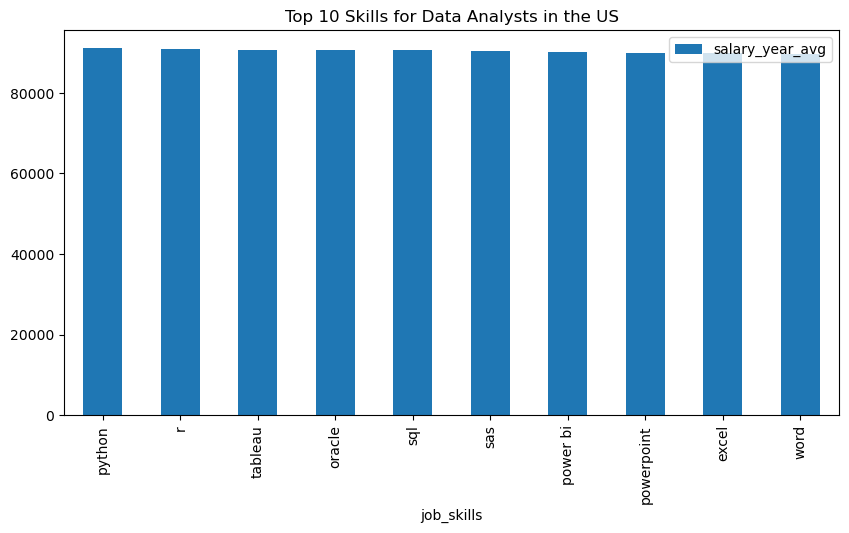

In [45]:
top_skills = df_DA_US_explode.groupby('job_skills').count().sort_values(by='job_title', ascending=False).head(10).index.tolist()
df_DA_US_explode = df_DA_US_explode[df_DA_US_explode['job_skills'].isin(top_skills)]
df_DA_US_explode = df_DA_US_explode.groupby('job_skills').agg({'job_title':'count', 'salary_year_avg':'mean'}).sort_values(by='salary_year_avg', ascending=False).reset_index()
df_DA_US_explode.plot(x='job_skills', y='salary_year_avg', kind='bar', figsize=(10,5))
plt.title('Top 10 Skills for Data Analysts in the US')